# Low-level implementation of a Linear Regression model in TensorFlow


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf  

random_seed = 0
np.random.seed(random_seed)

## Let's simulate a linear relationship between two variables

In [2]:
W_true = 20  # slope
b_true = 5  # intercept

x = np.linspace(0.18, 1.20, 100)
y = W_true * x + b_true + np.random.randn(*x.shape) * 2

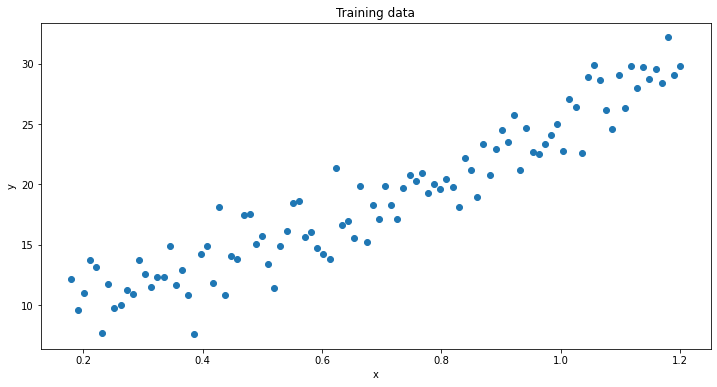

In [3]:
plt.figure(figsize=(12,6))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')

plt.title('Training data')
plt.show()

## Let's define a linear model

In [4]:
class LinearModel:
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name='W')
        self.bias = tf.Variable(np.random.randn(), name='b')

    def __call__(self, x):
        return self.weight * x + self.bias

## Loss function: MSE

In [5]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))

## The training routine consists of gradient descent optimization

In [6]:
def train(linear_model, x, y, learning_rate=0.01):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        current_loss = loss(y, y_pred)

    d_weight, d_bias = tape.gradient(current_loss, [linear_model.weight, linear_model.bias])

    linear_model.weight.assign_sub(learning_rate * d_weight)
    linear_model.bias.assign_sub(learning_rate * d_bias)

## Train ...

In [7]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100
lr = 0.5

for epoch in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y, linear_model(x))

    train(linear_model, x, y, learning_rate=lr)

    print(f"Epoch # {epoch}: loss -> {real_loss.numpy()}")

Epoch # 0: loss -> 391.01153564453125
Epoch # 1: loss -> 106.8003921508789
Epoch # 2: loss -> 33.65753173828125
Epoch # 3: loss -> 14.56436538696289
Epoch # 4: loss -> 9.342865943908691
Epoch # 5: loss -> 7.708751201629639
Epoch # 6: loss -> 7.026454925537109
Epoch # 7: loss -> 6.617806434631348
Epoch # 8: loss -> 6.305862903594971
Epoch # 9: loss -> 6.042309761047363
Epoch # 10: loss -> 5.812087535858154
Epoch # 11: loss -> 5.6089582443237305
Epoch # 12: loss -> 5.429205417633057
Epoch # 13: loss -> 5.270005702972412
Epoch # 14: loss -> 5.128972053527832
Epoch # 15: loss -> 5.004026412963867
Epoch # 16: loss -> 4.8933281898498535
Epoch # 17: loss -> 4.795252323150635
Epoch # 18: loss -> 4.70836067199707
Epoch # 19: loss -> 4.63137674331665
Epoch # 20: loss -> 4.563172340393066
Epoch # 21: loss -> 4.502744674682617
Epoch # 22: loss -> 4.4492082595825195
Epoch # 23: loss -> 4.401775360107422
Epoch # 24: loss -> 4.3597517013549805
Epoch # 25: loss -> 4.322518825531006
Epoch # 26: loss ->

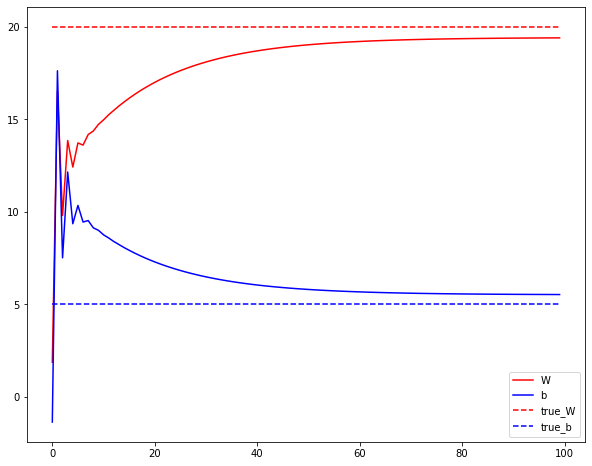

In [8]:
plt.figure(figsize=(10,8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W', 'b', 'true_W', 'true_b'])
plt.show()

In [9]:
print(f"Expected W={W_true}, b={b_true}")
print(f"Learned W={linear_model.weight.numpy()}, b={linear_model.bias.numpy()}")

Expected W=20, b=5
Learned W=19.397905349731445, b=5.53588342666626


## Results

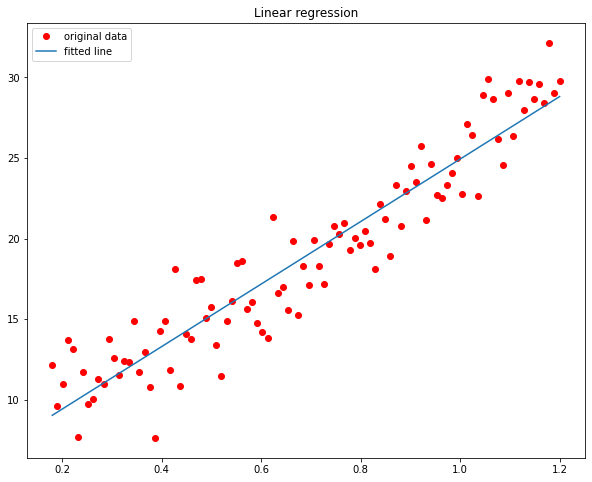

In [10]:
plt.figure(figsize=(10,8))

plt.plot(x, y, 'ro', label='original data')
plt.plot(x, linear_model(x), label='fitted line')

plt.title('Linear regression')

plt.legend()
plt.show()

## Try addressing real data

## Get global atmospheric CO2 concentration from NOAA

In [11]:
# Globally averaged atmospheric CO2 on marine surface - annual mean data:
url_co2_annmean_gl = 'https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/co2/co2_annmean_gl.txt'

co2_annmean_gl = pd.read_csv(url_co2_annmean_gl,
                             delim_whitespace=True,
                             skiprows=57,
                             usecols=[0, 1],
                             names=['year', 'co2'])

co2_annmean_gl.tail()

,year,co2
36,2016,403.09
37,2017,405.22
38,2018,407.62
39,2019,410.07
40,2020,412.46


In [12]:
co2_annmean_gl.describe()   

,year,co2
count,41.000000,41.000000
mean,2000.000000,371.527317
std,11.979149,21.880706
min,1980.000000,338.910000
25%,1990.000000,354.050000
50%,2000.000000,368.980000
75%,2010.000000,388.760000
max,2020.000000,412.460000


## Get global sea level from University of Colorado

In [13]:
import math
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Global mean sea level:
url_sea_levels = 'https://sealevel.colorado.edu/files/2020_rel1:%20Global%20Mean%20Sea%20Level%20(Seasonal%20Signals%20Retained)/gmsl_2020rel1_seasons_retained.txt'

sea_level_gl = pd.read_csv(url_sea_levels,
                           delim_whitespace=True,
                           skiprows=1,
                           names=['year', 'mm'])

sea_level_gl["year"] = sea_level_gl.apply(lambda x: math.floor(x['year']), axis=1)

mean_sea_level_gl = sea_level_gl.groupby("year", as_index=False).mean()

mean_sea_level_gl.tail()                           

,year,mm
24,2016,47.115789
25,2017,48.578378
26,2018,52.686486
27,2019,59.537838
28,2020,59.346429


In [14]:
mean_sea_level_gl.describe()     

,year,mm
count,29.000000,29.000000
mean,2006.000000,10.470625
std,8.514693,27.821195
min,1992.000000,-30.260000
25%,1999.000000,-14.900303
50%,2006.000000,8.769444
75%,2013.000000,30.608108
max,2020.000000,59.537838


## Get global land-ocean temperature from NASA

In [15]:
# Global land-ocean temperature change in 0.01 degrees Celsius with respect to Jan 1950:
url_ocean_temp_gl = 'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt'

ocean_temp_gl = pd.read_csv(url_ocean_temp_gl,
                            delim_whitespace=True,
                            skiprows=list(range(8)) + [29, 30, 51, 52, 73, 74, 95, 96, 117, 118, 139, 140, 161, 162],
                            skipfooter=8,
                            usecols=[0, 13],
                            engine='python',
                            names=['year', 'temp'])

ocean_temp_gl["temp"] = ocean_temp_gl.apply(lambda x: x['temp']/100, axis=1)

ocean_temp_gl.tail()                              

,year,temp
136,2016,1.02
137,2017,0.93
138,2018,0.85
139,2019,0.98
140,2020,1.02


In [16]:
ocean_temp_gl.describe()     

,year,temp
count,141.000000,141.000000
mean,1950.000000,0.049362
std,40.847277,0.358728
min,1880.000000,-0.480000
25%,1915.000000,-0.200000
50%,1950.000000,-0.070000
75%,1985.000000,0.230000
max,2020.000000,1.020000


## Plot the last 29 years of measurements (1992-2020)

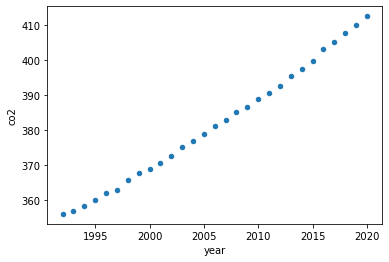

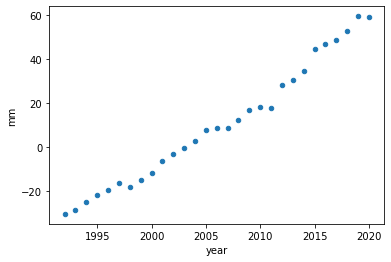

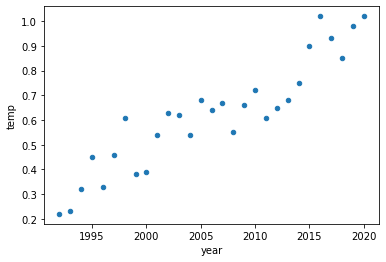

In [17]:
fig_co2_vs_year = co2_annmean_gl.iloc[-29:].plot.scatter(x='year', y='co2')
fig_mm_vs_year = mean_sea_level_gl.iloc[-29:].plot.scatter(x='year', y='mm')
fig_temp_vs_year = ocean_temp_gl.iloc[-29:].plot.scatter(x='year', y='temp')

## Fit a linear model to the CO2 concentration from year 1980 to year 2020

In [18]:
year_start, year_end = 1980, 2020  # modifying this won't change the time interval, only the scaling

linear_model_co2 = LinearModel()

loss_co2 = []

epochs_co2 = 150
lr_co2 = 0.2

x_orig = co2_annmean_gl.iloc[:,0].values
y_orig = co2_annmean_gl.iloc[:,1].values

# normalization
min_co2, max_co2 = np.min(y_orig), np.max(y_orig)
x = (x_orig - year_start) / (year_end - year_start)
y = (y_orig - min_co2) / (max_co2 - min_co2)

for epoch in range(epochs_co2):
    real_loss = loss(y, linear_model_co2(x))
    loss_co2.append(real_loss)

    train(linear_model_co2, x, y, learning_rate=lr_co2)

    print(f"Epoch # {epoch+1}: loss -> {real_loss.numpy()}")

Epoch # 1: loss -> 0.45934244990348816
Epoch # 2: loss -> 0.40860849618911743
Epoch # 3: loss -> 0.3801606297492981
Epoch # 4: loss -> 0.3579985797405243
Epoch # 5: loss -> 0.3381921947002411
Epoch # 6: loss -> 0.31974267959594727
Epoch # 7: loss -> 0.3023648262023926
Epoch # 8: loss -> 0.28594911098480225
Epoch # 9: loss -> 0.2704308032989502
Epoch # 10: loss -> 0.2557579278945923
Epoch # 11: loss -> 0.24188382923603058
Epoch # 12: loss -> 0.2287648320198059
Epoch # 13: loss -> 0.21635979413986206
Epoch # 14: loss -> 0.20462985336780548
Epoch # 15: loss -> 0.19353827834129333
Epoch # 16: loss -> 0.18305030465126038
Epoch # 17: loss -> 0.17313309013843536
Epoch # 18: loss -> 0.16375558078289032
Epoch # 19: loss -> 0.15488843619823456
Epoch # 20: loss -> 0.14650383591651917
Epoch # 21: loss -> 0.13857552409172058
Epoch # 22: loss -> 0.13107867538928986
Epoch # 23: loss -> 0.12398982793092728
Epoch # 24: loss -> 0.11728674918413162
Epoch # 25: loss -> 0.11094848066568375
Epoch # 26: loss

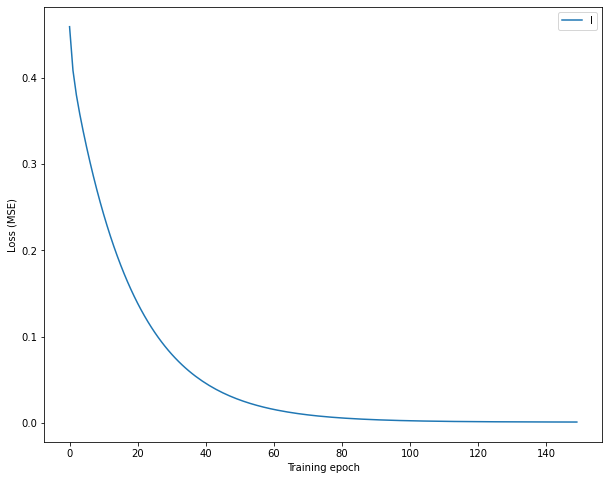

In [19]:
plt.figure(figsize=(10,8))

plt.plot(range(epochs_co2), loss_co2)

plt.legend('loss')
plt.xlabel('Training epoch')
plt.ylabel('Loss (MSE)')
plt.show()

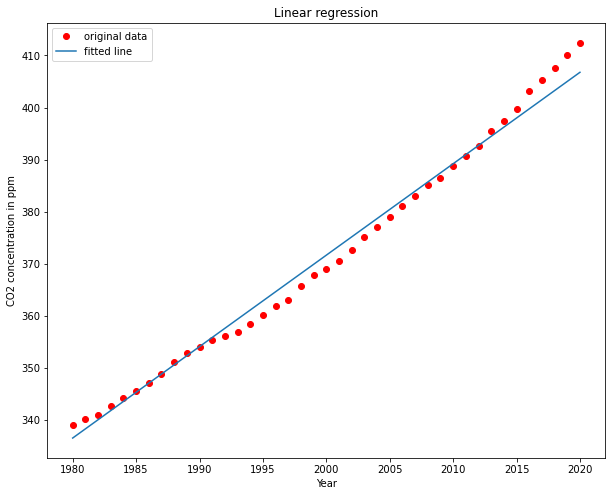

In [20]:
plt.figure(figsize=(10,8))

plt.plot(x_orig, y_orig, 'ro', label='original data')
plt.plot(x_orig, linear_model_co2((x_orig - year_start) / (year_end - year_start))*(max_co2 - min_co2) + min_co2, label='fitted line')

plt.title('Linear regression')
plt.xlabel('Year')
plt.ylabel('CO2 concentration in ppm')

plt.legend()
plt.show()

## Let's predict the CO2 concentration in the future

In [21]:
future_year = 2050
future_co2 = (linear_model_co2((future_year - year_start) / (year_end - year_start))*(max_co2 - min_co2) + min_co2).numpy()

print(f"The annual mean of global atmospheric CO2 on marine surface in the year {future_year} will be close to {math.floor(future_co2)} ppm according the the linear model.")

The annual mean of global atmospheric CO2 on marine surface in the year 2050 will be close to 459 ppm according the the linear model.


## Fit a linear model to the sea level from year 1992 to year 2020

In [22]:
year_start, year_end = 1992, 2020  # modifying this won't change the time interval, only the scaling

linear_model_sea_lvl = LinearModel()

loss_sea_lvl = []

epochs_sea_lvl = 150
lr_sea_lvl = 0.2

x_orig = mean_sea_level_gl.iloc[:,0].values
y_orig = mean_sea_level_gl.iloc[:,1].values

# normalization
min_sea_lvl, max_sea_lvl = np.min(y_orig), np.max(y_orig)
x = (x_orig - year_start) / (year_end - year_start)
y = (y_orig - min_sea_lvl) / (max_sea_lvl - min_sea_lvl)

for epoch in range(epochs_sea_lvl):
    real_loss = loss(y, linear_model_sea_lvl(x))
    loss_sea_lvl.append(real_loss)

    train(linear_model_sea_lvl, x, y, learning_rate=lr_sea_lvl)

    print(f"Epoch # {epoch+1}: loss -> {real_loss.numpy()}")

Epoch # 1: loss -> 1.243350625038147
Epoch # 2: loss -> 0.708871066570282
Epoch # 3: loss -> 0.5567266345024109
Epoch # 4: loss -> 0.49854499101638794
Epoch # 5: loss -> 0.46432971954345703
Epoch # 6: loss -> 0.43704187870025635
Epoch # 7: loss -> 0.41248786449432373
Epoch # 8: loss -> 0.3895922303199768
Epoch # 9: loss -> 0.36803895235061646
Epoch # 10: loss -> 0.34769922494888306
Epoch # 11: loss -> 0.32849255204200745
Epoch # 12: loss -> 0.3103529214859009
Epoch # 13: loss -> 0.2932201623916626
Epoch # 14: loss -> 0.2770383656024933
Epoch # 15: loss -> 0.2617546319961548
Epoch # 16: loss -> 0.24731911718845367
Epoch # 17: loss -> 0.2336847484111786
Epoch # 18: loss -> 0.22080707550048828
Epoch # 19: loss -> 0.2086441069841385
Epoch # 20: loss -> 0.19715616106987
Epoch # 21: loss -> 0.18630577623844147
Epoch # 22: loss -> 0.1760575920343399
Epoch # 23: loss -> 0.16637814044952393
Epoch # 24: loss -> 0.15723589062690735
Epoch # 25: loss -> 0.1486010104417801
Epoch # 26: loss -> 0.1404

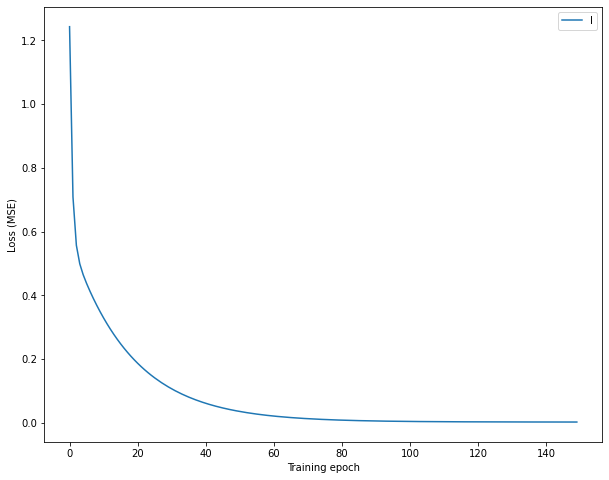

In [23]:
plt.figure(figsize=(10,8))

plt.plot(range(epochs_sea_lvl), loss_sea_lvl)

plt.legend('loss')
plt.xlabel('Training epoch')
plt.ylabel('Loss (MSE)')
plt.show()

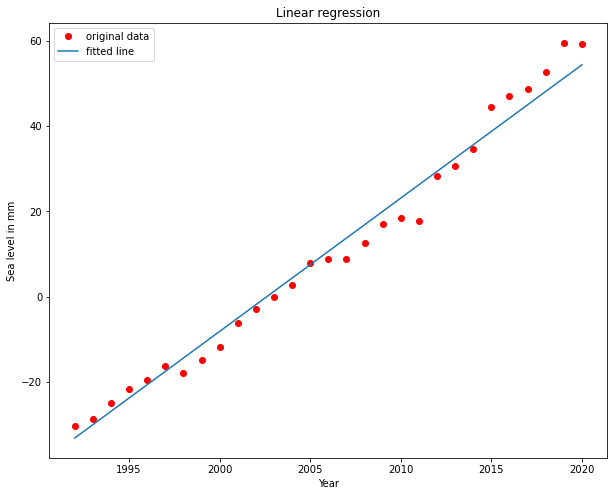

In [24]:
plt.figure(figsize=(10,8))

plt.plot(x_orig, y_orig, 'ro', label='original data')
plt.plot(x_orig, linear_model_sea_lvl((x_orig - year_start) / (year_end - year_start))*(max_sea_lvl - min_sea_lvl) + min_sea_lvl, label='fitted line')

plt.title('Linear regression')
plt.xlabel('Year')
plt.ylabel('Sea level in mm')

plt.legend()
plt.show()

## Let's predict the sea level in the future

In [25]:
future_year = 2050
future_sea_lvl = (linear_model_sea_lvl((future_year - year_start) / (year_end - year_start))*(max_sea_lvl - min_sea_lvl) + min_sea_lvl).numpy()

print(f"The sea level in the year {future_year} will be about {math.floor(future_sea_lvl - y_orig[-1])} mm higher than today, according the the linear model.")

The sea level in the year 2050 will be about 88 mm higher than today, according the the linear model.


## Fit a linear model to the ocean temperature change from year 1880 to year 2020

In [26]:
year_start, year_end = 1992, 2020  # modifying this won't change the time interval, only the scaling

linear_model_sea_temp = LinearModel()

loss_sea_temp = []

epochs_sea_temp = 200
lr_sea_temp = 0.1

x_orig = ocean_temp_gl.iloc[-29:,0].values
y_orig = ocean_temp_gl.iloc[-29:,1].values

# normalization
min_sea_temp, max_sea_temp = np.min(y_orig), np.max(y_orig)
x = (x_orig - year_start) / (year_end - year_start)
y = (y_orig - min_sea_temp) / (max_sea_temp - min_sea_temp)

for epoch in range(epochs_sea_temp):
    real_loss = loss(y, linear_model_sea_temp(x))
    loss_sea_temp.append(real_loss)

    train(linear_model_sea_temp, x, y, learning_rate=lr_sea_temp)

    print(f"Epoch # {epoch+1}: loss -> {real_loss.numpy()}")

Epoch # 1: loss -> 2.2735774517059326
Epoch # 2: loss -> 1.2858307361602783
Epoch # 3: loss -> 0.7353957891464233
Epoch # 4: loss -> 0.428483784198761
Epoch # 5: loss -> 0.2571861147880554
Epoch # 6: loss -> 0.16141466796398163
Epoch # 7: loss -> 0.10770991444587708
Epoch # 8: loss -> 0.07743993401527405
Epoch # 9: loss -> 0.06022954359650612
Epoch # 10: loss -> 0.05030113086104393
Epoch # 11: loss -> 0.04443724453449249
Epoch # 12: loss -> 0.04084601625800133
Epoch # 13: loss -> 0.03852939233183861
Epoch # 14: loss -> 0.03693138062953949
Epoch # 15: loss -> 0.03574211522936821
Epoch # 16: loss -> 0.0347888320684433
Epoch # 17: loss -> 0.033975087106227875
Epoch # 18: loss -> 0.033246949315071106
Epoch # 19: loss -> 0.03257416933774948
Epoch # 20: loss -> 0.03193967789411545
Epoch # 21: loss -> 0.03133377432823181
Epoch # 22: loss -> 0.030750850215554237
Epoch # 23: loss -> 0.0301875788718462
Epoch # 24: loss -> 0.029641926288604736
Epoch # 25: loss -> 0.029112564399838448
Epoch # 26: 

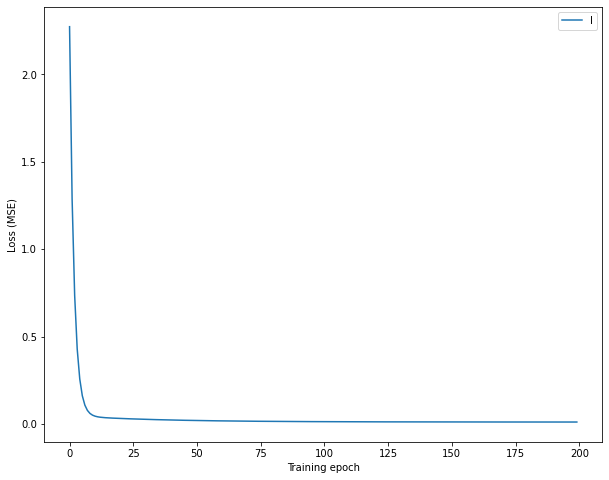

In [27]:
plt.figure(figsize=(10,8))

plt.plot(range(epochs_sea_temp), loss_sea_temp)

plt.legend('loss')
plt.xlabel('Training epoch')
plt.ylabel('Loss (MSE)')
plt.show()

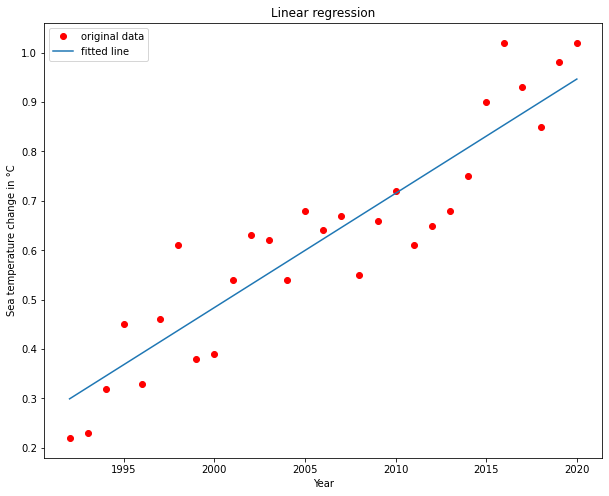

In [28]:
plt.figure(figsize=(10,8))

plt.plot(x_orig, y_orig, 'ro', label='original data')
plt.plot(x_orig, linear_model_sea_temp((x_orig - year_start) / (year_end - year_start))*(max_sea_temp - min_sea_temp) + min_sea_temp, label='fitted line')

plt.title('Linear regression')
plt.xlabel('Year')
plt.ylabel('Sea temperature change in °C')

plt.legend()
plt.show()

## Let's predict the sea temperature change in the future

In [29]:
future_year = 2050
future_sea_temp = (linear_model_sea_temp((future_year - year_start) / (year_end - year_start))*(max_sea_temp - min_sea_temp) + min_sea_temp).numpy()

print("The sea temperature change in the year {0} will be about {1:.2f} °C, according the the linear model.".format(future_year, future_sea_temp))

The sea temperature change in the year 2050 will be about 1.64 °C, according the the linear model.
